In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('C:\\Users\\Dhanush\\OneDrive\\Desktop\\churn_prediction_project\\heart_disease_prediction\\heart_disease_data.csv')

In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

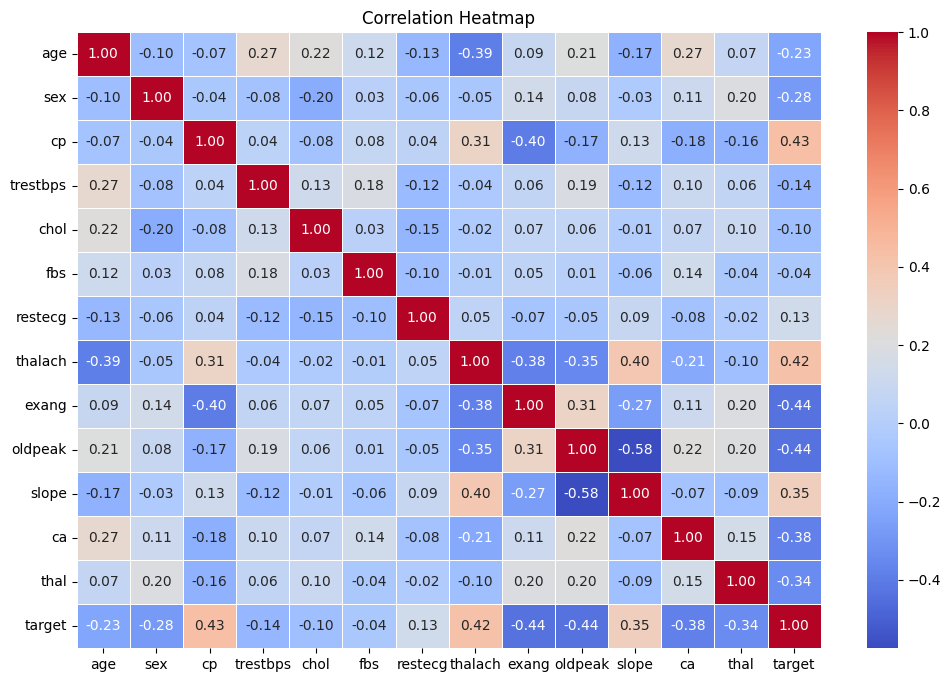

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [21]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
print(X_train)

[[-0.58584022  0.65465367  1.008275   ...  1.00526437  2.17169136
  -0.54519316]
 [ 1.05147737 -1.52752523 -0.91672034 ...  1.00526437 -0.7254674
  -0.54519316]
 [-0.04006769 -1.52752523  1.008275   ...  1.00526437 -0.7254674
  -0.54519316]
 ...
 [-0.36753121  0.65465367 -0.91672034 ...  1.00526437 -0.7254674
   1.11057867]
 [-1.24076726  0.65465367 -0.91672034 ...  1.00526437 -0.7254674
   1.11057867]
 [-0.2583767   0.65465367 -0.91672034 ...  1.00526437  0.24025219
  -0.54519316]]


In [24]:
print(X_test)

[[ 0.83316836 -1.52752523 -0.91672034 ...  1.00526437 -0.7254674
  -0.54519316]
 [-0.1492222  -1.52752523  1.008275   ...  1.00526437 -0.7254674
  -3.85673683]
 [ 0.06908682  0.65465367 -0.91672034 ... -0.64007851  0.24025219
   1.11057867]
 ...
 [-1.13161275  0.65465367  1.008275   ...  1.00526437 -0.7254674
  -0.54519316]
 [ 0.72401385  0.65465367 -0.91672034 ...  1.00526437  0.24025219
   1.11057867]
 [ 0.39655033  0.65465367  1.008275   ... -0.64007851  0.24025219
   1.11057867]]


In [25]:
import matplotlib.pyplot as plt

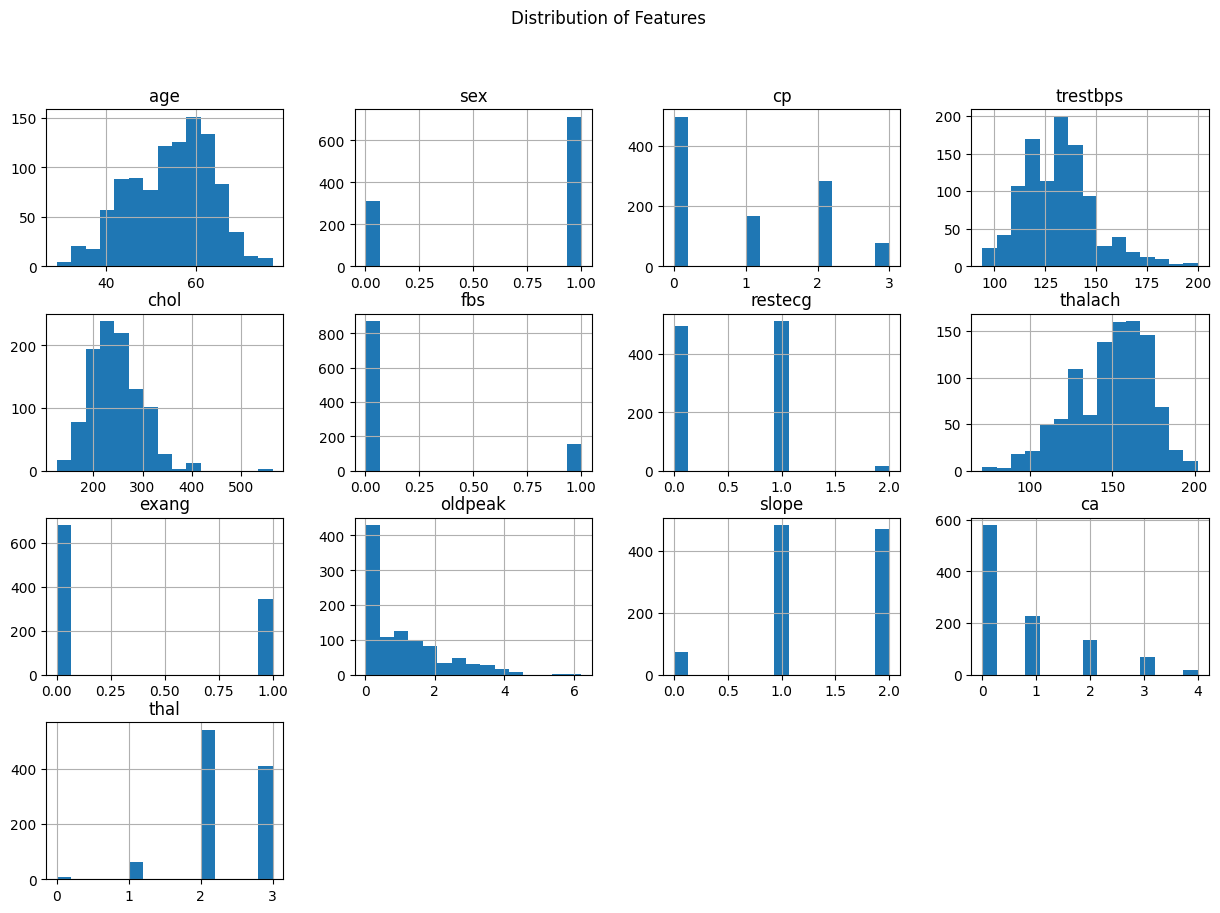

In [26]:
df.drop('target', axis=1).hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.show()

In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
importances = model.feature_importances_

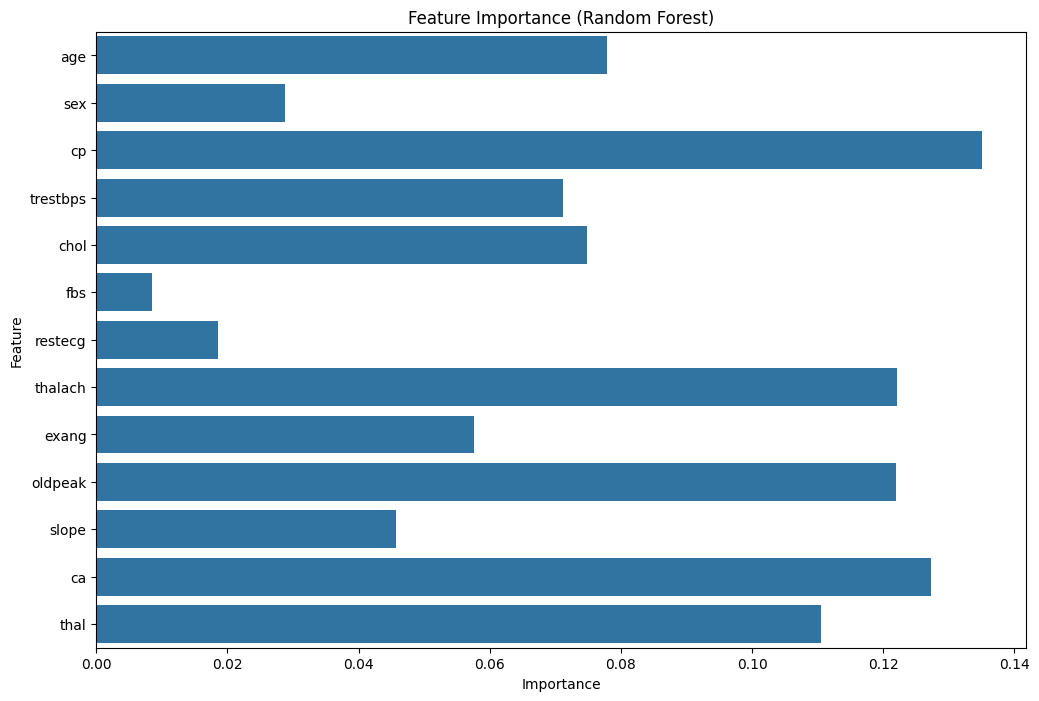

In [30]:
feature_names = df.drop('target', axis=1).columns
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()